In [ ]:
#Importing the files
import pyarrow.parquet as pq
import os
import pandas as pd

# Defining the directory
loc = '/content/drive/MyDrive/data/train'

# Adding all parquet files
pfs = [f for f in os.listdir(loc) if f.endswith('.parquet')]

dataframes = []

# Loop through each Parquet file, read it, and append to the list
for f in pfs:
    path = os.path.join(loc, file)
    x = pq.read_table(path).to_pandas()
    dataframes.append(x)

# Concatanating all the dataframe into one
data = pd.concat(dataframes, ignore_index=True)

In [ ]:
data.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,1618806578,Shirley Temple Pastime book 1935 Saalfield Pub...,Shirley Temple Pastime book 1935 Saalfield Pub...,"child,childrens book,hardcover,vintage",physical,,,,,,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,10,orange,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
1,1647978452,Vintage children&#39;s book from the 1960s 1963,According to § 19 UStG. VAT is not shown on th...,,physical,,,,,birthday,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,17,white,14,red,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,428
2,694926553,"Vintage Children&#39;s Book and Record, Little...",Vintage children&#39;s book and record. 24 pag...,"puss in boots,cat,classic,disney,disneyland,vi...",physical,,,,,birthday,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,9,green,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,763
3,1524591637,"You&#39;re in Love, Charlie Brown - Charles M....","You&#39;re in Love, Charlie Brown \nCharles M....","collectible books,gifts for readers,gift ideas...",physical,,,,,,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,2,blue,14,red,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,427
4,1633806231,The Children of the Frostmoor: A Swedish story...,The Children of the Frostmoor \nA Swedish Sto...,"Children Frostmoor,Laura Fitinghoff,Rosa Peth...",physical,,,,,birthday,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,14,red,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760


In [ ]:
import pandas as pd

#  empty tags row removed
len(data[combined_df['tags'] == ''])


31169

In [ ]:
#deleting rows which hasnt got tags
data = data[data['tags'] != '']

In [ ]:
print(data.isnull().sum())
print(data.shape)

product_id              0
title                   0
description             0
tags                    0
type                    0
room                    0
craft_type              0
recipient               0
material                0
occasion                0
holiday                 0
art_subject             0
style                   0
shape                   0
pattern                 0
bottom_category_id      0
bottom_category_text    0
top_category_id         0
top_category_text       0
primary_color_id        0
primary_color_text      0
secondary_color_id      0
secondary_color_text    0
image/encoded           0
image/width             0
image/height            0
dtype: int64
(198455, 26)


In [ ]:
# rows with empty title
len(data[data['title'] == ''])

2

In [ ]:
#deleting the rows without title
data = data[data['title'] != '']

In [ ]:
import html
df = data
sp = r'[^\w\s]'  # Matches any character that is not a word character or whitespace
sp_pattern = r'\s'  # Matching the whitespace character

# Remove special characters and spaces from the specified column
df['title'] = df['title'].apply(html.unescape)
df['title'] = df['title'].str.replace(sp, '')
df['title'] = df['title'].str.replace(sp_pattern, '')


df.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,1618806578,Shirley Temple Pastime book 1935 Saalfield Pub...,Shirley Temple Pastime book 1935 Saalfield Pub...,"child,childrens book,hardcover,vintage",physical,,,,,,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,10,orange,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
2,694926553,"Vintage Children's Book and Record, Little Gol...",Vintage children&#39;s book and record. 24 pag...,"puss in boots,cat,classic,disney,disneyland,vi...",physical,,,,,birthday,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,9,green,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,763
3,1524591637,"You're in Love, Charlie Brown - Charles M. Sch...","You&#39;re in Love, Charlie Brown \nCharles M....","collectible books,gifts for readers,gift ideas...",physical,,,,,,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,2,blue,14,red,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,427
4,1633806231,The Children of the Frostmoor: A Swedish story...,The Children of the Frostmoor \nA Swedish Sto...,"Children Frostmoor,Laura Fitinghoff,Rosa Peth...",physical,,,,,birthday,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,14,red,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
7,1090130977,NODDY meets Santa hardback Christmas book Chil...,Vintage NODDY meets Santa hardback Christmas b...,"Noddy,Father Christmas,Christmas book,Noddy bo...",physical,,,,,,...,books_movies_and_music.books.childrens_books,4,books_movies_and_music,18,yellow,14,red,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     8 non-null      int64 
 1   title          8 non-null      object
 2   description    8 non-null      object
 3   tags           8 non-null      object
 4   type           8 non-null      object
 5   room           8 non-null      object
 6   craft_type     8 non-null      object
 7   recipient      8 non-null      object
 8   material       8 non-null      object
 9   occasion       8 non-null      object
 10  holiday        8 non-null      object
 11  art_subject    8 non-null      object
 12  style          8 non-null      object
 13  shape          8 non-null      object
 14  pattern        8 non-null      object
 15  image/encoded  8 non-null      object
 16  image/width    8 non-null      int64 
 17  image/height   8 non-null      int64 
dtypes: int64(3), object(15)
memory usa

In [ ]:
#seeking the unique values for "category id" and "text"
print(data['top_category_id'].unique())
data['top_category_text'].unique()

[ 4  5  8  3  2  6 14  0 11 13  9 12  7 10  1]


array(['books_movies_and_music', 'clothing', 'home_and_living',
       'bath_and_beauty', 'bags_and_purses', 'craft_supplies_and_tools',
       'weddings', 'accessories', 'pet_supplies', 'toys_and_games',
       'jewelry', 'shoes', 'electronics_and_accessories',
       'paper_and_party_supplies', 'art_and_collectibles'], dtype=object)

In [ ]:
data.iloc[0]
data.head(2)
data['type'].unique() # column's  values of column
data['type'].value_counts(dropna=False)


type
physical    188129
download     10138
               186
Name: count, dtype: int64

In [ ]:

COLORS = data['primary_color_id'].unique()
NUM_COLORS = len(COLORS)

f"Number of top categories in train: {len(data['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [ ]:
f"Number of primary colors in train: {NUM_COLORS:,}"

'Number of primary colors in train: 19'

In [ ]:
#Sum of number of all occurences of top category text
pd.value_counts(data['top_category_text'], ascending=False,sort=True )

top_category_text
home_and_living                46966
craft_supplies_and_tools       29296
clothing                       25400
toys_and_games                 11943
paper_and_party_supplies       10975
accessories                    10698
bath_and_beauty                 9431
weddings                        8805
art_and_collectibles            7718
shoes                           7712
jewelry                         6768
electronics_and_accessories     6650
books_movies_and_music          5634
bags_and_purses                 5319
pet_supplies                    5138
Name: count, dtype: int64

In [ ]:
#Sum of number of all occurences of primary color text
pd.value_counts(data['primary_color_text'], sort=True, ascending=False)

primary_color_text
black        26841
white        24614
blue         23661
brown        17187
red          14044
pink         13909
green        13405
beige        10175
silver        9542
gold          8526
other         7226
yellow        6354
purple        5923
orange        4905
clear         3956
rainbow       3658
bronze        2128
copper        1656
rose gold      743
Name: count, dtype: int64

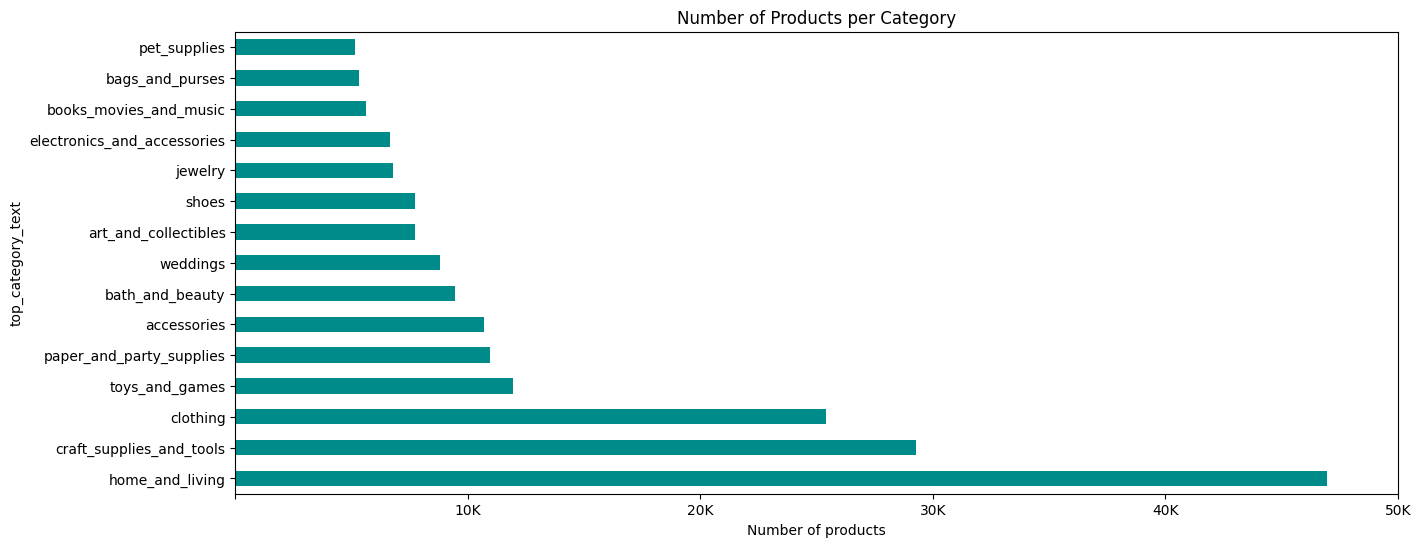

In [ ]:
#all products per category
import matplotlib.pyplot as plt
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'

figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(combined_df[column], sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

In [ ]:
import os
from datetime import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn import metrics
import glob


font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [ ]:
def show_images(dataframe, N=100):
    num_cols = 5
    num_rows = N // num_cols
    plt_height = 3 * num_rows
    plt.figure(figsize=(12, plt_height))
    for i, row in dataframe[:N].iterrows():
        # axis
        ax = plt.subplot(num_rows, num_cols, i + 1)
        # data
        img_bytes = row["image/encoded"]
        label = row["top_category_text"] if "top_category_text" in row else "unknown"
        # image
        bytes_io = io.BytesIO(img_bytes)
        image = Image.open(bytes_io)
        # plot
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(label, fontsize = 12)
    plt.show()

In [ ]:
import pyarrow.parquet as pp
import os
import pandas as pd

#  directory having the Parquet files
loc = '/content/drive/MyDrive/data/test'

# List of  all the Parquet files in the directory
pf = [f for f in os.listdir(loc) if f.endswith('.parquet')]

dataframes = []

# Looping  each Parquet file and appending  to the list
for f in pf:
    fp = os.path.join(directory, f)
    d = pp.read_table(fp).to_pandas()
    dataframes.append(d)

 testing_dataframe = pd.concat(dataframes, ignore_index=True)

In [ ]:
df.shape
testing_dataframe.shape

(25514, 18)

**Random Forest employed to predict Top Category ID**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

attributes = ['title', 'tags', 'type']
targeted_value = 'top_category_id'


X = data[attributes]
y = data[targeted_value]

category_columns = [columns for columns in attributes if data[columns].dtype == "object"]
text = ['tags','title']

# Calculating TF and IDF for title and tags
preprocessor = ColumnTransformer(
    transformers=[
        ('category', OneHotEncoder(handle_unknown='ignore'), category_columns),
        ('titletext', TfidfVectorizer(max_features=10000), 'title'),
        ('itemtags', TfidfVectorizer(max_features=10000), 'tags')
    ],
    remainder='passthrough'
)

X_training, X_value, y_training, y_value = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForestClassifier directly for single output classification
randomforest_model = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', randomforest_model)])

pipeline.fit(X_training, y_training)

predicted_y = pipeline.predict(X_value)

# Evaluating accuracy
accuracy_score = accuracy_score(y_value, predicted_y)

print(f"Validation Accuracy: {accuracy_score}")

Validation Accuracy: 0.8470182157164092


In [ ]:
# Prediction on test data
predictions_top_category = pipeline.predict(testing_dataframe[attributes])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
# Calculating the F1 score
f1score = f1_score(y_value, predicted_y,average='weighted')

print(f"Validation F1 Score: {f1score}")

Validation F1 Score: 0.8429677820951846


In [ ]:
testing_dataframe['top_category_id']=predictions_top_category

**Predicting the Primary Color ID**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#  text data preprocessing
token = Tokenizer()
texts =data['title'] + ' ' + data['tags']  # Combine title and tags into a single string
token.fit_on_texts(texts)
X = token.texts_to_sequences(texts)
X = pad_sequences(X)  # Ensure all sequences have the same length

#  target variable encoding
encoder = LabelEncoder()
y = encoder.fit_transform(data['primary_color_id'])

#  train and test sets data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture with added dropout for regularization
model = Sequential()
model.add(Embedding(input_dim=len(token.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(Conv1D(60, 10, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))  # Dropout layer added to prevent overfitting
model.add(LSTM(60))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))  # Another dropout layer
model.add(Dense(19, activation='softmax'))

# Compile the model with a more suitable optimizer and learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation data and early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, model_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", model_accuracy)

# Calculate the F1 score
y_pred = np.argmax(model.predict(X_test), axis=1)  # Get the index of the max probability
f1score = f1_score(y_test, y_pred, average='weighted')  # 'weighted' takes into consideration label imbalance
print("Test F1 Score:", f1score)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 86, 100)           12709200  
                                                                 
 conv1d (Conv1D)             (None, 77, 60)            60060     
                                                                 
 max_pooling1d (MaxPooling1  (None, 38, 60)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 38, 60)            0         
                                                                 
 lstm (LSTM)                 (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                        

In [ ]:
# Predicting new data
Z = token.texts_to_sequences(testing_dataframe['title'] + ' ' + testing_dataframe['tags'])
Z = pad_sequences(Z, maxlen=X.shape[1])
predicted_probabilities = model.predict(Z)
predicted_color_id = np.argmax(predicted_probabilities, axis=1)  # Use np.argmax to find the class index
print("Predicted primary_color_id:", predicted_color_id)

798/798 [==============================] - 6s 8ms/step
Predicted primary_color_id: [13  1  4 ...  4  7  4]


In [ ]:
testing_dataframe['primary_color_id']=predicted_color_id

**Predicting Bottom Category ID **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd



attributes = ['title', 'tags']
target_id = 'bottom_category_id'  # single target variable prediction


X = df[attributes]
y = df[target_id]

category_columns = [i for i in attributes if data[i].dtype == "object"]
text_cols = ['title', 'tags']  # including tags in text

# Adjusting preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), category_columns),
        ('text_title', TfidfVectorizer(max_features=10000), 'title'),
        ('text_tags', TfidfVectorizer(max_features=10000), 'tags')
    ],
    remainder='passthrough'
)

X_training, X_value, y_training, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_rfc)])

pipeline.fit(X_training, y_training)

y_prediction = pipeline.predict(X_value)

#  accuracy evaluation
model_accuracy = accuracy_score(y_value, y_prediction)

print(f"Validation Accuracy: {model_accuracy}")

Validation Accuracy: 0.6321332291955355


In [ ]:
testing_dataframe = pd.read_parquet(parquet_file_path)

(25514, 18)

In [ ]:
# Prediction on test data
top_category_predictions = pipeline.predict(testing_dataframe[attributes])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
#  F1 score calculation
f1score = f1_score(y_validation, y_prediction,average='weighted')

print(f"Validation F1 Score: {f1score}")

Validation F1 Score: 0.6152373879814419


In [ ]:
testing_dataframe['bottom_category_id']=top_category_predictions

In [ ]:
import pandas as pd
all_df = pd.read_parquet('/content/drive/MyDrive/data/test_cat_pcid_id.parquet')
bot_df = pd.read_parquet('/content/drive/MyDrive/data/test_bot_id.parquet')

In [ ]:
all_df['bottom_category_id']=bot_df['bottom_category_id']

**Predicting Secondary Color Id **

In [ ]:
import pandas as pd
df = pd.read_parquet('/content/drive/MyDrive/data/cleaned.parquet')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Selecting relevant arrtibutes
attributes = ['title', 'tags']

# Making feature matrix as X and target as y
X = df[attributes]
y = df['secondary_color_id']

# Testing and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Attributes Vectorizing
vector = CountVectorizer()
X_train_vec = vector.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test_vec = vector.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Gradient Boosting
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vec, y_train)

# Prediction
y_prediction = clf.predict(X_test_vec)

#  Evaluation of the model
model_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", model_accuracy)


Accuracy: 0.30865939381723817


In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_prediction, average='macro')
print("F1-score:", f1score)

F1-score: 0.28510989810075205


In [ ]:
import pyarrow.parquet as pq
import os
import pandas as pd

# Parquet files path
directory = '/content/drive/MyDrive/data/test'

# List of  all Parquet files
parquet_files = [file for file in os.listdir(directory) if file.endswith('.parquet')]

dfs = []

# Loop through each Parquet file, read it, and append to the list
for file in parquet_files:
    filepath = os.path.join(directory, file)
    dft = pq.read_table(filepath).to_pandas()
    dfs.append(dft)

# All the dataframe in single one
testing_dataframe = pd.concat(dfs, ignore_index=True)

In [ ]:
#  relevant features selection
attributes = ['title', 'tags']

X_new = testing_dataframe[attributes]
X_new_vector = vectorizer.transform(X_new.apply(lambda x: ' '.join(x), axis=1))

# new data predictions
y_prediction_new = clf.predict(X_new_vetor)

# Displaying the predictions
print("predicted_secondary_color_id:", y_prediction_new)

predicted_secondary_color_id: [ 1  4 17 ... 17  7  4]


In [ ]:
testing_dataframe['secondary_color_id']=y_prediction_new

In [ ]:
columns = ['product_id', 'top_category_id', 'bottom_category_id','primary_color_id','secondary_color_id']

prediction = testing_dataframe[columns].copy()

In [ ]:
import pandas as pd

parquet_file = '/content/drive/MyDrive/data/predictions_23263895.parquet'

prediction.to_parquet(parquet_file)